# Data Selection:


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#Loading data
Loan = pd.read_csv('C:\Users\ADMIN\Downloads\loan_data.csv')
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [97]:
#number of instances
num_instances=len(Loan)
num_instances

381

There is 381 number of instances

In [98]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


 #### Number of instnces:381
 #### Number of featers:13
 #### Target variable: Whether the loan was approved or not (target variable)

### Data Preprocessing:

In [99]:
# The number of missing values

print("Missing reords",Loan.isnull().sum())

Missing reords Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [100]:
# The missing %

print("Missing reords",(Loan.isnull().sum()/len(Loan))*100)

Missing reords Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


The variable Gender has 1% of missing values, Dependents have 2% of missing values, Self_Employed have 6% of missing values
, Loan_Amount_Status have 3% of missing values, and Credit_History have 8% of missing values. Since there is No variable with more than 20% of missing values, we have to impute.

In [101]:
# the total number of each records 

print("Records found",Loan.count())

Records found Loan_ID              381
Gender               376
Married              381
Dependents           373
Education            381
Self_Employed        360
ApplicantIncome      381
CoapplicantIncome    381
LoanAmount           381
Loan_Amount_Term     370
Credit_History       351
Property_Area        381
Loan_Status          381
dtype: int64


In [102]:
#DISCRIPTIVE STATISTICS FOR THE LOAN
Loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


<Axes: >

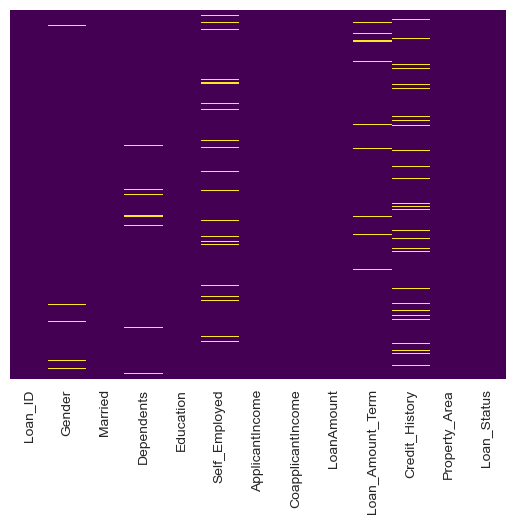

In [103]:
#Generate a heatmap plot that visualizes the missing values in the Loan dataset
sns.heatmap(Loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since the percentage of the missing values of the variables Gender, Dependents, Self_Employed, Self_Employed, Loan_Amount_Term, Credit_History is below 20% we do not drop the variables. The proportion of these missing variables is likely small enough for reasonable replacement with some form of imputation.

### Vidualising data before encoding 

In [104]:
# proportions
tab = pd.crosstab(index=Loan['Loan_Status'], columns='count')
(tab/tab.sum())*100


col_0,count
Loan_Status,
N,28.871391
Y,71.128609


<Axes: xlabel='Loan_Status', ylabel='count'>

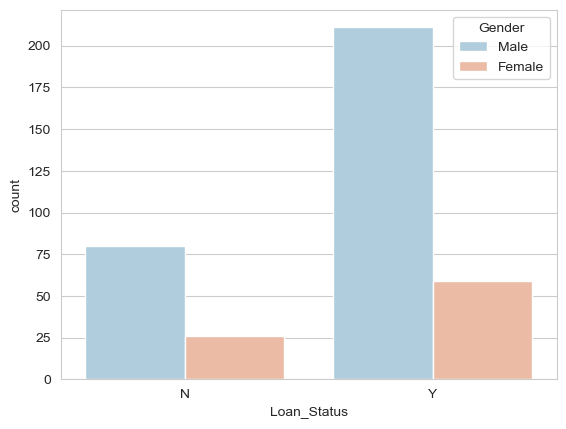

In [105]:
#education & Loan_status
sns.countplot(x='Loan_Status',hue='Gender',data=Loan,palette='RdBu_r')

The graph shows that more Males are likely to get a loan than Females

<Axes: xlabel='Loan_Status', ylabel='count'>

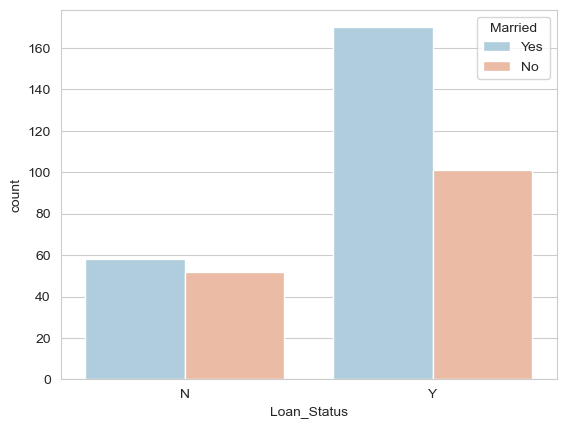

In [106]:
#count plot based on the Loan_Status variable in the loan dataset
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Married', data=Loan,palette='RdBu_r')

The graph shows that Married people are more likely to get the loan than people who are not married. 

<Axes: xlabel='Loan_Status', ylabel='count'>

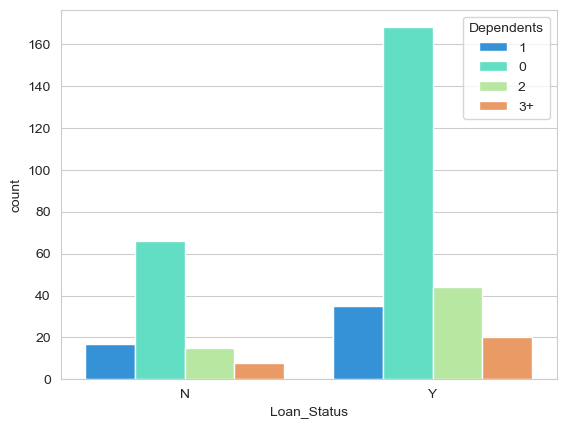

In [107]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Dependents',data=Loan,palette='rainbow')

People who are independent are more likey to get a Loan

<Axes: xlabel='Loan_Status', ylabel='count'>

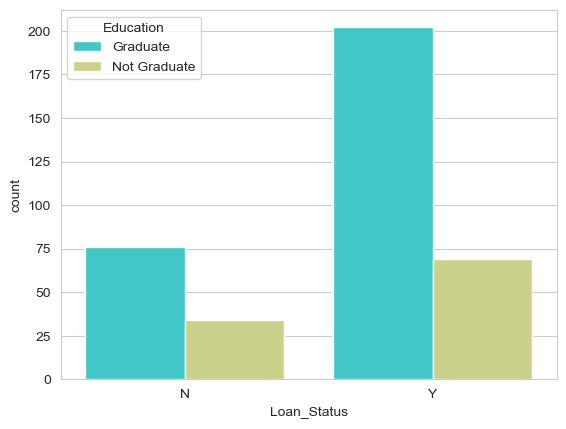

In [108]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Education',data=Loan,palette='rainbow')

Graduates are more likely to get a loan than individuals who have not graduated.

<Axes: xlabel='Loan_Status', ylabel='count'>

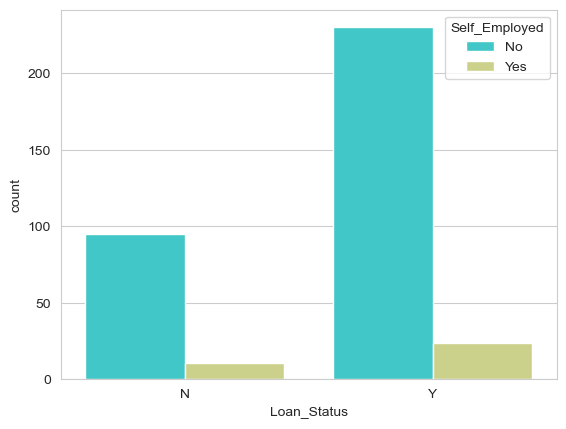

In [109]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Self_Employed',data=Loan,palette='rainbow')

Individuals who are not Self employed are more likely to get a loan than individuals who are Self employed

C:\Users\Hannah\AppData\Local\Temp\ipykernel_16528\2972201096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loan['ApplicantIncome'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='ApplicantIncome'>

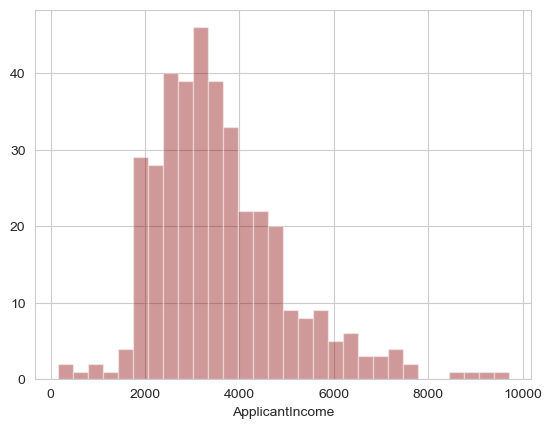

In [110]:
sns.distplot(Loan['ApplicantIncome'].dropna(),kde=False,color='darkred',bins=30)

C:\Users\Hannah\AppData\Local\Temp\ipykernel_16528\871892175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loan['LoanAmount'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='LoanAmount'>

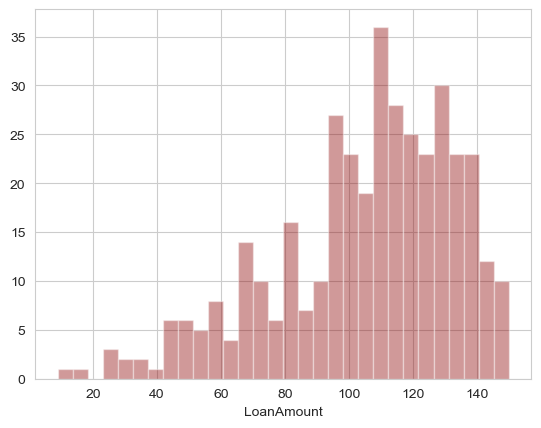

In [111]:
sns.distplot(Loan['LoanAmount'].dropna(),kde=False,color='darkred',bins=30)

C:\Users\Hannah\AppData\Local\Temp\ipykernel_16528\241042841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loan['Loan_Amount_Term'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Loan_Amount_Term'>

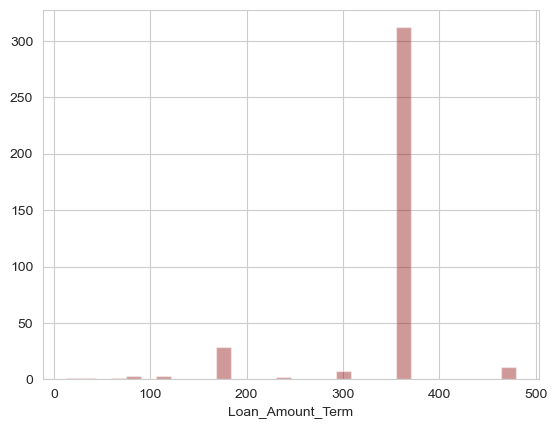

In [112]:
sns.distplot(Loan['Loan_Amount_Term'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='Loan_Status', ylabel='count'>

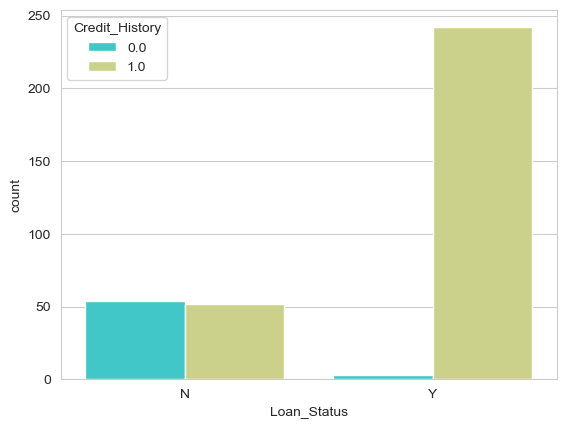

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Credit_History',data=Loan,palette='rainbow')

Individuals who have a credit history of 1.0 are more likely to get a loan than individuals who have a credit history of 0.0

<Axes: xlabel='Loan_Status', ylabel='count'>

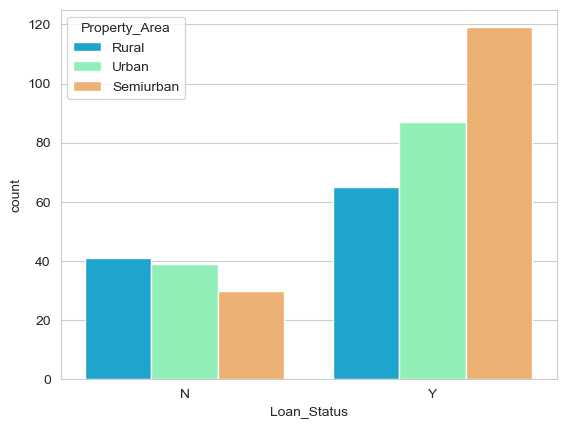

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Property_Area',data=Loan,palette='rainbow')

individuals who live in Semiurban are more likely to get a loan then individuls who live in Urban and Rural. Also individuals who live in Urban are more likely to get a loan than individuals who live in Rural.

###### Creating a distribution plot

C:\Users\Hannah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


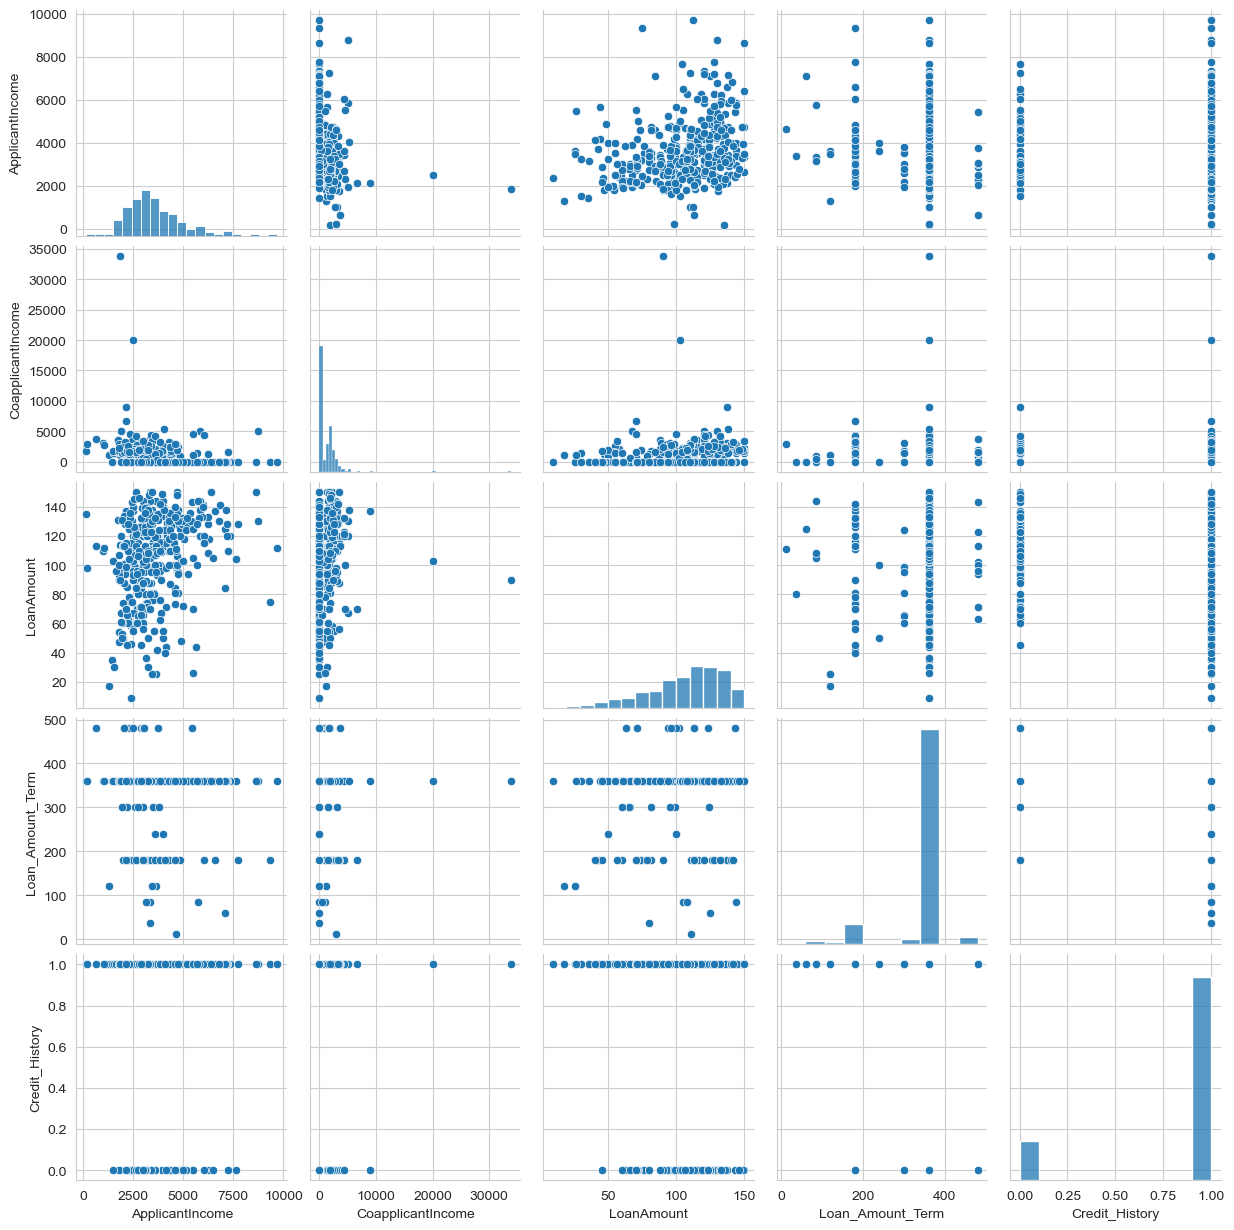

In [115]:
sns.pairplot(Loan)

### Data cleaning

In [116]:
#Imputation

In [117]:
#Modes of the variable Gender.
#filling in any missing values in the 'Gender' column with the calculated mode values
Gender_modes=Loan['Gender'].mode()[0]
Loan['Gender'].fillna(Gender_modes, inplace=True)
Gender_modes

'Male'

In [118]:
#Modes of the variable Dependents.
#filling in any missing values in the 'Dependents' column with the calculated mode values
Dependents_modes=Loan['Dependents'].mode()[0]
Loan['Dependents'].fillna(Dependents_modes, inplace=True)

In [119]:
#Modes of the variable Self_Employed.
#filling in any missing values in the 'Self_Employed' column with the calculated mode values
Self_Employed_modes=Loan['Self_Employed'].mode()[0]
Loan['Self_Employed'].fillna(Self_Employed_modes, inplace=True)

<Axes: xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

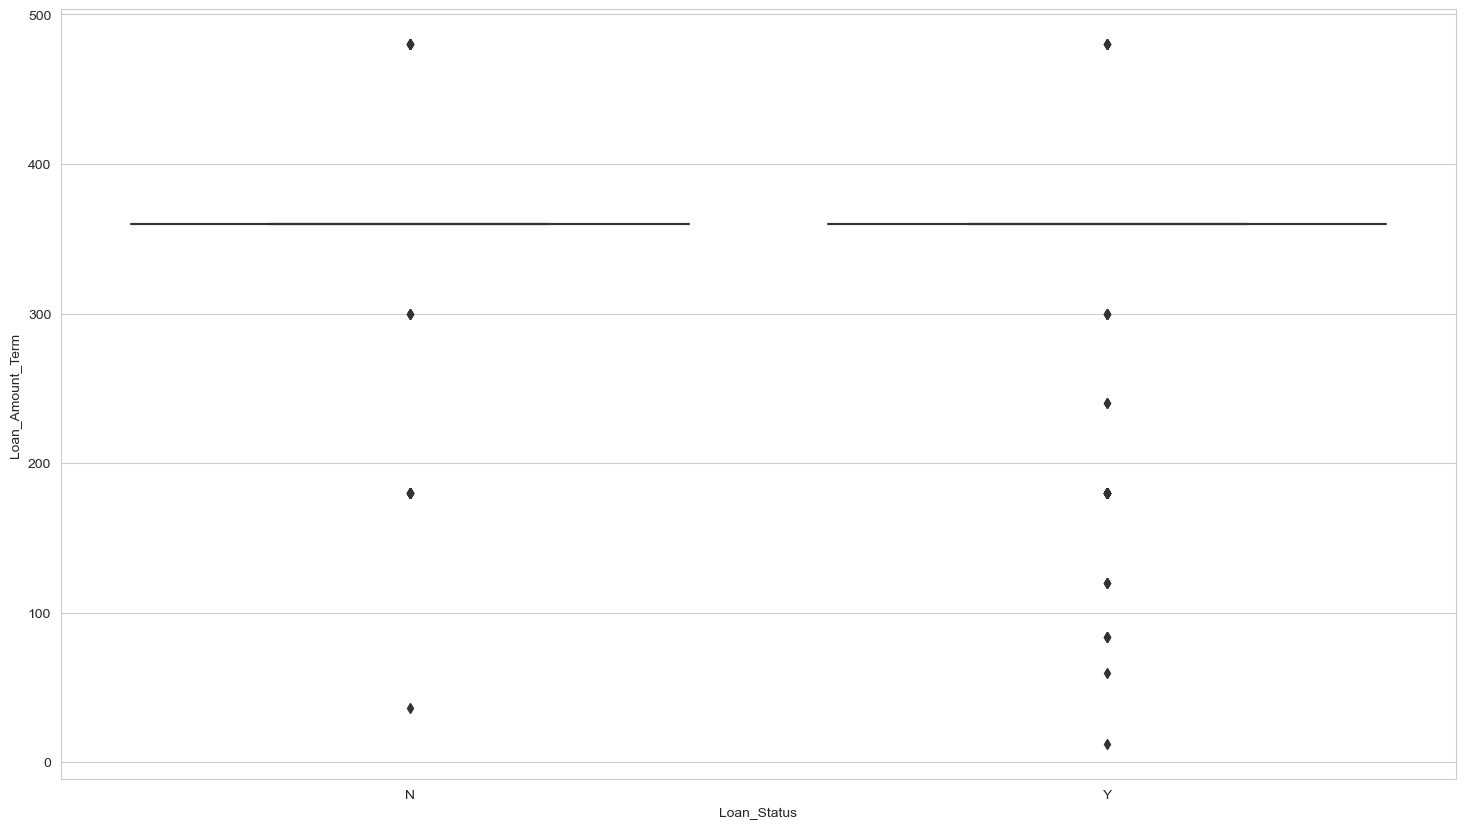

In [120]:
#Mean of the variable Loan_Amount_Term.
plt.figure(figsize=(18, 10))
sns.boxplot(x='Loan_Status',y='Loan_Amount_Term',data=Loan,palette='winter')

In [121]:
#Modes of the variable Loan_Amount_Term.
#filling in any missing values in the 'Loan_Amount_Term' column with the calculated mean values
Loan_Amount_Term_mean=Loan['Loan_Amount_Term'].mean()
Loan['Loan_Amount_Term'].fillna(Loan_Amount_Term_mean, inplace=True)

In [122]:
#Modes of the variable Credit_History.
#filling in any missing values in the 'Credit_History' column with the calculated mode values
Credit_History_modes=Loan['Credit_History'].mode()[0]
Loan['Credit_History'].fillna(Credit_History_modes, inplace=True)

<Axes: >

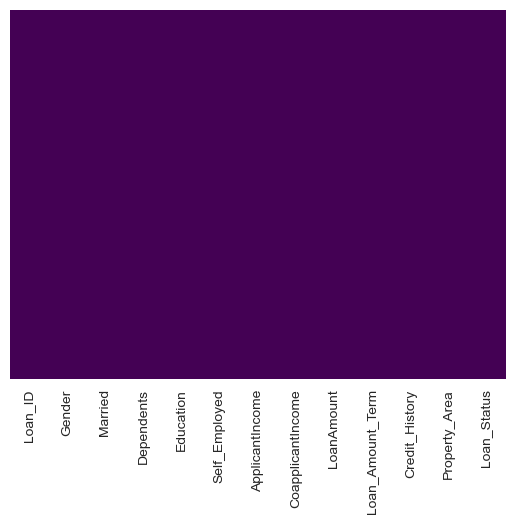

In [123]:
sns.heatmap(Loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [124]:
# Select numerical columns
numeric_columns = Loan.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

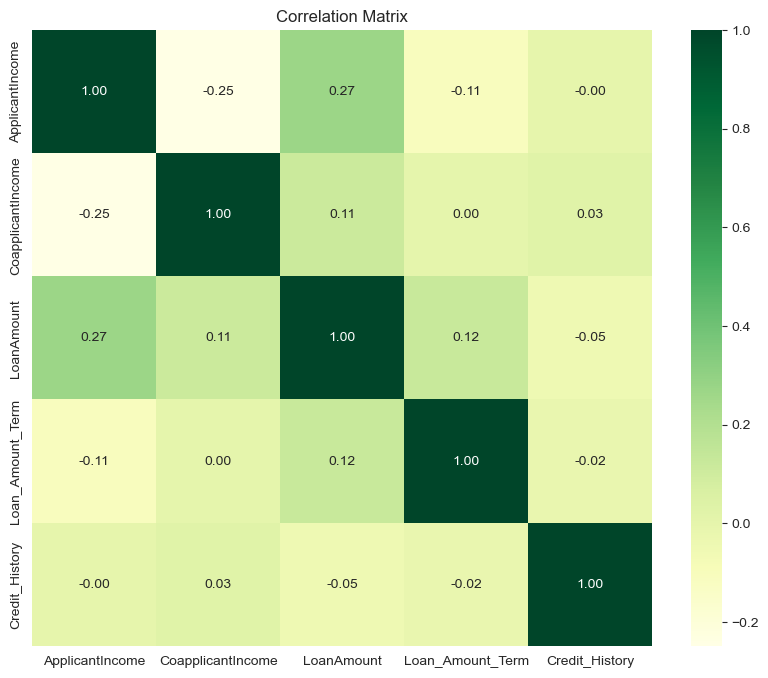

In [125]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [126]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


### encoding categorical variables

In [127]:
Loan['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [128]:
Loan['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [129]:
Loan['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [130]:
Loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [131]:
Loan['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [132]:
Loan['Credit_History'].unique()

array([1., 0.])

In [133]:
Loan['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [134]:
Loan['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [135]:
gender = pd.get_dummies(Loan['Gender'],drop_first=True).astype(int)
married= pd.get_dummies(Loan['Married'],drop_first=True).astype(int)
dependents = pd.get_dummies(Loan['Dependents'],drop_first=True).astype(int)
education = pd.get_dummies(Loan['Education'],drop_first=True).astype(int)
self_Employed= pd.get_dummies(Loan['Self_Employed'],drop_first=True).astype(int)
credit_History = pd.get_dummies(Loan['Credit_History'],drop_first=True).astype(int)
property_Area = pd.get_dummies(Loan['Property_Area'],drop_first=True).astype(int)
loan_Status = pd.get_dummies(Loan['Loan_Status'],drop_first=True).astype(int)

In [136]:
#dropping the encoded variables
Loan.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'],axis=1,inplace=True)

In [137]:
#Assigning the Dataframe into the variable
loan=pd.concat([Loan,gender,married,dependents,education,self_Employed,credit_History,property_Area,loan_Status],axis=1)
loan

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Male,Yes,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,Y
0,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
1,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
2,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
3,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1
4,2333,1516.0,95.0,360.0,1,1,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1,1,0,0,1,0,0,1,0,1,1
377,3232,1950.0,108.0,360.0,1,1,0,0,0,0,0,1,0,0,1
378,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,1,0,0,1
379,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,1,0,0,1


### Checking multicollinearity

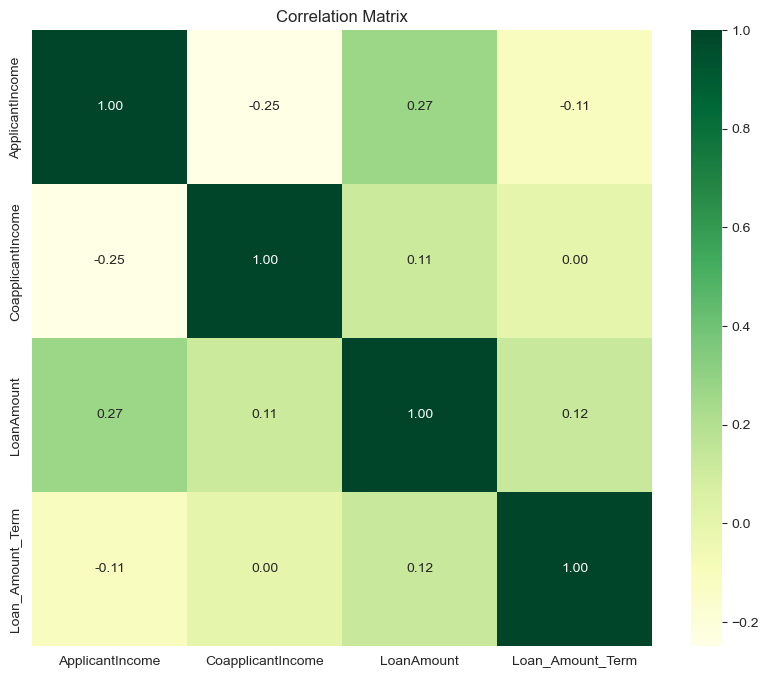

In [138]:
# Select numerical columns
numeric_columns = Loan.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

There correlation between the variables is weak. Thus Multi-colinearity will not be a problem. 

#### The Correlation matrix shows that our data does not have multi-colinearity. 

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Yes'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3+'}>,
        <Axes: title={'center': 'Not Graduate'}>,
        <Axes: title={'center': 'Yes'}>, <Axes: title={'center': '1.0'}>],
       [<Axes: title={'center': 'Semiurban'}>,
        <Axes: title={'center': 'Urban'}>, <Axes: title={'center': 'Y'}>,
        <Axes: >]], dtype=object)

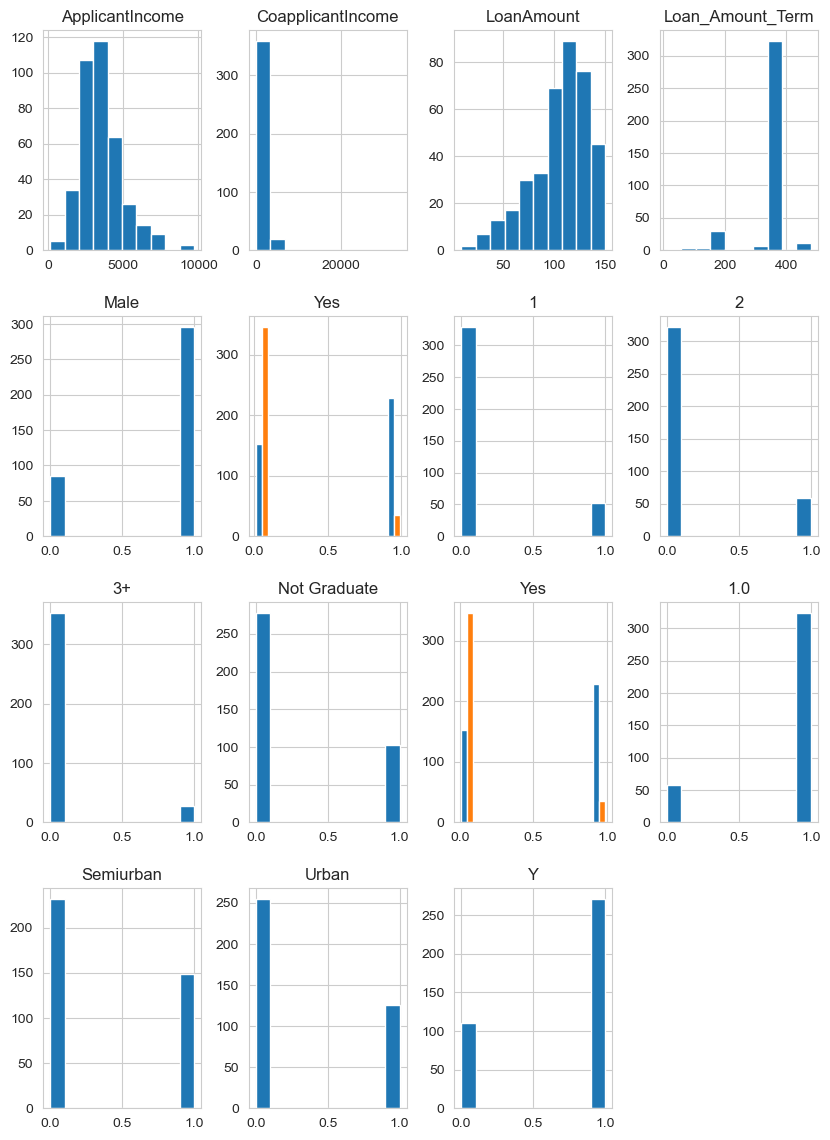

In [139]:
# Select only numerical columns
numeric_columns = loan.select_dtypes(include='number')

# Plot histograms for each numerical column
numeric_columns.hist(figsize=(10, 14))

## Model Implimentation

### Splitting the data into train and test

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(loan.drop('Y',axis=1), 
                                                    loan['Y'], test_size=0.30, 
                                                    random_state=101)

### Training and Predicting

In [142]:
 from sklearn.linear_model import LogisticRegression

In [143]:
#Converting X_train features to strings 
X_train.columns = X_train.columns.astype(str)

In [144]:
#Fitting the model to the training data
logmodel = LogisticRegression()
Model = logmodel.fit(X_train,y_train)
   

In [145]:
#Converting X_test features to strings 
X_test.columns = X_test.columns.astype(str)

In [146]:
#Assigning trained logistic model to predict using test data
predictions = logmodel.predict(X_test)

### Stat Model

In [147]:
import statsmodels.api as sm



In [148]:
#Fitting the model to the training data
glm = sm.GLM(y_train,X_train, family=sm.families.Binomial())
results = glm.fit()

In [149]:
#Converting X_test features to strings 
X_test.columns = X_test.columns.astype(str)

In [150]:
#Assigning trained logistic model to predict using test data
predictions = logmodel.predict(X_test)

In [151]:
#Creating the GLM Object

glm = sm.GLM(y_train,
X_train,
family=sm.families.Binomial())
results = glm.fit()

In [152]:
#Summary pf results
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                  266
Model:                            GLM   Df Residuals:                      252
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.26
Date:                Thu, 21 Mar 2024   Deviance:                       214.52
Time:                        07:13:38   Pearson chi2:                     294.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3230
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ApplicantIncome   -3.426e-05      0.00

### Evaluation Matrix

In [153]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [154]:
#Making predictions on the testing data
predictions = Model.predict(X_test)

In [155]:
#Printing a classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.84      1.00      0.91        81

    accuracy                           0.86       115
   macro avg       0.92      0.76      0.80       115
weighted avg       0.88      0.86      0.85       115



In [156]:
## Calculating and print evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1391304347826087
MSE: 0.1391304347826087
RMSE: 0.3730019232961255


#### MAE (Mean Absolute Error): 0.1391304347826087. This indicates that, on average, the model's predictions differ from the actual values by approximately 0.139.
#### MSE (Mean Squared Error): 0.1391304347826087. This measures the average of the squared differences between the predicted and actual values.
#### RMSE (Root Mean Squared Error): 0.3730019232961255. This is the square root of the MSE and represents the standard deviation of the prediction errors. In this case, it is approximately 0.373

In [157]:
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8608695652173913


#### The accuracy value of 0.8608695652173913 indicates that the model's overall correct prediction rate is approximately 86.1%. 

In [158]:
from sklearn.metrics import confusion_matrix
#Creating confusion matrix of TP,TN,FP,FN
confusion_matrix(y_test, predictions)

array([[18, 16],
       [ 0, 81]], dtype=int64)

#### This information helps evaluate the performance of a classification model and gives an understanding of its predicted accuracy.
#### The number of true negatives is 18. There are 16 false positives, and no false negatives. Additionally, there are 81 true positives.

## Cross validation

In [159]:
from sklearn.model_selection import cross_val_score
# Create a logistic regression model
Model = LogisticRegression()

# Perform k-fold cross-validation
k = 5  # Number of folds
cross_val_scores = cross_val_score(Model, X_train, y_train, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.85185185 0.88679245 0.83018868 0.83018868 0.79245283]
Mean cross-validation score: 0.8382948986722573


C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

#### The array [0.85185185, 0.88679245, 0.83018868, 0.83018868, 0.79245283] denotes the individual accuracy scores achieved in each fold of the cross-validation process.
#### The mean cross-validation score of approximately 0.838 indicates that the model performs consistently well across different subsets of the data, suggesting a good generalization capability

### Bootstrap

In [160]:
#Importing packages
from sklearn.utils import resample
from scipy.stats import sem

In [161]:

# Define the number of bootstrap iterations
n_iterations = 1000

# Initialize an empty list to store bootstrapped scores
bootstrap_scores = []

# Define logistic regression model with 'liblinear' solver and increased max_iter
Model = LogisticRegression(solver='liblinear', max_iter=1000)

In [162]:
# Perform bootstrapping
for _ in range(n_iterations):
    # Resample the training data with replacement
    X_boot, y_boot = resample(X_train, y_train, replace=True, random_state=101)

In [163]:
# Train your model on the bootstrapped data
Model.fit(X_boot, y_boot)

LogisticRegression(max_iter=1000, solver='liblinear')

In [164]:
  # Make predictions on the testing data
predictions = Model.predict(X_test)

In [165]:
# Calculate the accuracy score for the bootstrapped sample
score = metrics.accuracy_score(y_test, predictions)
    

In [166]:
  # Append the score to the list of bootstrap scores
bootstrap_scores.append(score)

In [167]:
# Calculate the confidence interval (95%) for the bootstrapped scores
confidence_interval = np.percentile(bootstrap_scores, [2.5, 97.5])

In [168]:

# Print the confidence interval
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: [0.84347826 0.84347826]


#### The confidence interval [0.84347826 0.84347826] suggests that we can be 95% confident that the true accuracy of the model lies within this range

## Model Selection

In [169]:
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.metrics import mean_squared_error

In [170]:
# Function to compute RSS (Residual Sum of Squares)
def compute_rss(model, X, y):
    y_pred = model.predict(X)
    rss = np.sum((y - y_pred) ** 2)
    return rss

In [171]:
# Function to perform Best Subset Selection
def best_subset_selection(X, y, max_features):
    # Get the list of all predictors
    predictors = X.columns
    n_predictors = len(predictors)
    
    best_models = {}
    
    for k in range(1, max_features + 1):
        best_rss = np.inf
        best_subset = None
        
        # Generate all combinations of predictors with length k
        for subset in combinations(predictors, k):
            subset = list(subset)
            X_subset = X[subset]
            
            # Fit linear regression model
            model = LogisticRegression()
            model.fit(X_subset, y)
            
            # Compute RSS
            rss = compute_rss(model, X_subset, y)
            
            # If current model has lower RSS, update best subset
            if rss < best_rss:
                best_rss = rss
                best_subset = subset
                best_model = model
                
        best_models[k] = {'RSS': best_rss, 'model': best_model, 'predictors': best_subset}
        
    return best_models


In [172]:
# Perform Best Subset Selection with maximum 5 features
max_features = 5
best_models = best_subset_selection(X_train, y_train, max_features)


C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [173]:
# Print the best models for each number of features
for k, v in best_models.items():
    print(f"Number of features: {k}, RSS: {v['RSS']}, Predictors: {v['predictors']}")

Number of features: 1, RSS: 43, Predictors: ['1.0']
Number of features: 2, RSS: 43, Predictors: ['ApplicantIncome', '1.0']
Number of features: 3, RSS: 43, Predictors: ['ApplicantIncome', 'CoapplicantIncome', '1.0']
Number of features: 4, RSS: 41, Predictors: ['ApplicantIncome', 'Yes', '1', '1.0']
Number of features: 5, RSS: 41, Predictors: ['ApplicantIncome', 'LoanAmount', 'Yes', '1', '1.0']


In [174]:
# Choose the best model based on RSS or any other criterion and evaluate on test data
best_model = best_models[max_features]['model']
X_test_subset = X_test[best_models[max_features]['predictors']]
test_rss = compute_rss(best_model, X_test_subset, y_test)
print(f"Test RSS of the best model: {test_rss}")

Test RSS of the best model: 16


####  The results shows that the RSS for the best model is 16. 
#### A lower RSS value typically indicates a better fit of the model to the test data, suggesting that the model's predictions closely match the actual test data points.

### Shrinkage Method

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [176]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [177]:
# Define and train the Ridge Regression model
alpha = 0.1  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [178]:
# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)

In [179]:
# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

In [180]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy of Ridge Regression model:", accuracy)

Accuracy of Ridge Regression model: 0.8608695652173913


#### The model has an accuracy score of approximately 0.86, suggesting that it correctly predicts the outcome for roughly 86% of the data points used for evaluation.

In [181]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [182]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.84      1.00      0.91        81

    accuracy                           0.86       115
   macro avg       0.92      0.76      0.80       115
weighted avg       0.88      0.86      0.85       115



## Lasso Regression (L1 regularization)

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [184]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
# Define and train the Lasso Regression model
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [186]:
# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred)

In [187]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy of Lasso Regression model:", accuracy)

Accuracy of Lasso Regression model: 0.8608695652173913


The model has an accuracy score of approximately 0.86, suggesting that it correctly predicts the outcome for roughly 86% of the data points used for evaluation.

In [188]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.84      1.00      0.91        81

    accuracy                           0.86       115
   macro avg       0.92      0.76      0.80       115
weighted avg       0.88      0.86      0.85       115



## PSL

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score

In [193]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the PLS regression model
n_components = 6  # Number of components
pls_model = PLSRegression(n_components=n_components)
pls_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = pls_model.predict(X_test_scaled)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy of PLS Regression model:", accuracy)


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score


print(classification_report(y_test,y_pred_binary))


Accuracy of PLS Regression model: 0.8608695652173913
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.84      1.00      0.91        81

    accuracy                           0.86       115
   macro avg       0.92      0.76      0.80       115
weighted avg       0.88      0.86      0.85       115

